<a href="https://colab.research.google.com/github/gaiamilenium99/ProyectoSustituto/blob/main/SeoulBike.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Seoul Bike Rental

#### Importamos las librerias

In [151]:
import numpy as np
import pandas as pd
import os
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import mean_squared_log_error
from scipy import stats

#### Subimos la base de datos

In [224]:
df_train = pd.read_csv('/content/train.csv',encoding= 'unicode_escape')
df_test = pd.read_csv('/content/test.csv',encoding= 'unicode_escape')
df_tester = pd.read_csv('/content/tester.csv',encoding= 'unicode_escape')

# Eliminamos el valor a hallar
df_test = df_test.drop(columns = ['y'])

In [153]:
df_train.head()

,Date,y,Hour,Temperature(°C),Humidity(%),Wind speed (m/s),Visibility (10m),Dew point temperature(°C),Solar Radiation (MJ/m2),Rainfall(mm),Snowfall (cm),Seasons,Holiday,Functioning Day
0,01/12/2017,254,0,-5.2,37,2.2,2000,-17.6,0.0,0.0,0.0,Winter,No Holiday,Yes
1,01/12/2017,204,1,-5.5,38,0.8,2000,-17.6,0.0,0.0,0.0,Winter,No Holiday,Yes
2,01/12/2017,173,2,-6.0,39,1.0,2000,-17.7,0.0,0.0,0.0,Winter,No Holiday,Yes
3,01/12/2017,107,3,-6.2,40,0.9,2000,-17.6,0.0,0.0,0.0,Winter,No Holiday,Yes
4,01/12/2017,78,4,-6.0,36,2.3,2000,-18.6,0.0,0.0,0.0,Winter,No Holiday,Yes


In [154]:
df_test.head()

,Date,Hour,Temperature(°C),Humidity(%),Wind speed (m/s),Visibility (10m),Dew point temperature(°C),Solar Radiation (MJ/m2),Rainfall(mm),Snowfall (cm),Seasons,Holiday,Functioning Day
0,21/12/2017,0,-1.3,90,2.0,259,-2.7,0.0,0.0,2.2,Winter,No Holiday,Yes
1,21/12/2017,1,-1.8,90,1.6,263,-3.2,0.0,0.0,2.2,Winter,No Holiday,Yes
2,21/12/2017,2,-2.2,88,1.4,348,-3.9,0.0,0.0,2.2,Winter,No Holiday,Yes
3,21/12/2017,3,-2.9,89,1.3,288,-4.4,0.0,0.0,2.2,Winter,No Holiday,Yes
4,21/12/2017,4,-3.6,91,1.2,241,-4.8,0.0,0.0,2.2,Winter,No Holiday,Yes


#### Observamos los datos

In [216]:
df_train.columns

Index(['Date', 'y', 'Hour', 'Humidity(%)', 'Wind speed (m/s)',
       'Visibility (10m)', 'Solar Radiation (MJ/m2)', 'Rainfall(mm)',
       'Snowfall (cm)', 'Seasons', 'Holiday', 'Functioning Day', 'Month',
       'Day', 'Weekday', 'working_hour', 'temp_pca'],
      dtype='object')

In [217]:
df_train.dtypes

,0
Date,object
y,int64
Hour,int64
Humidity(%),int64
Wind speed (m/s),float64
Visibility (10m),int64
Solar Radiation (MJ/m2),float64
Rainfall(mm),float64
Snowfall (cm),float64
Seasons,int8



### Arreglando algunos datos, la Temperature (°) y fecha


In [218]:
df_train = df_train.rename(columns = {df_train.columns[3] : 'Temperature (C)', df_train.columns[7] : 'Dew point temperature (C)'})
df_test = df_test.rename(columns = {df_test.columns[2] : 'Temperature (C)', df_test.columns[6] : 'Dew point temperature (C)'})
# Se observan los cambios
df_train.columns


Index(['Date', 'y', 'Hour', 'Temperature (C)', 'Wind speed (m/s)',
       'Visibility (10m)', 'Solar Radiation (MJ/m2)',
       'Dew point temperature (C)', 'Snowfall (cm)', 'Seasons', 'Holiday',
       'Functioning Day', 'Month', 'Day', 'Weekday', 'working_hour',
       'temp_pca'],
      dtype='object')

In [219]:
df_test.columns

Index(['Hour', 'Humidity(%)', 'Temperature (C)', 'Solar Radiation (MJ/m2)',
       'Rainfall(mm)', 'Seasons', 'Dew point temperature (C)', 'Month', 'Day',
       'Weekday', 'working_hour', 'temp_pca', 'y'],
      dtype='object')

In [220]:
df_train.describe()

,y,Hour,Temperature (C),Wind speed (m/s),Visibility (10m),Solar Radiation (MJ/m2),Dew point temperature (C),Snowfall (cm),Seasons,Holiday,Functioning Day,Month,Day,Weekday,working_hour,temp_pca
count,480.000000,480.000000,480.000000,480.000000,480.000000,480.000000,480.000000,480.000000,480.0,480.0,480.0,480.000000,480.000000,480.000000,480.000000,4.800000e+02
mean,264.885417,11.500000,53.354167,1.768333,1488.087500,0.211479,0.027292,0.448125,0.0,0.0,0.0,8.700000,13.800000,3.100000,0.666667,-2.368476e-16
std,168.381927,6.929408,19.904773,1.169621,635.364713,0.364528,0.207543,0.985784,0.0,0.0,0.0,3.800011,2.640934,1.999582,0.471896,8.060406e+00
min,9.000000,0.000000,21.000000,0.000000,59.000000,0.000000,0.000000,0.000000,0.0,0.0,0.0,1.000000,12.000000,0.000000,0.000000,-1.259508e+01
25%,144.750000,5.750000,38.000000,0.900000,1047.500000,0.000000,0.000000,0.000000,0.0,0.0,0.0,5.750000,12.000000,1.750000,0.000000,-6.722329e+00
50%,240.000000,11.500000,49.000000,1.500000,1820.000000,0.000000,0.000000,0.000000,0.0,0.0,0.0,10.500000,12.000000,3.000000,1.000000,-1.981959e+00
75%,354.000000,17.250000,69.000000,2.500000,2000.000000,0.257500,0.000000,0.000000,0.0,0.0,0.0,12.000000,15.250000,5.000000,1.000000,5.830915e+00
max,937.000000,23.000000,96.000000,5.800000,2000.000000,1.260000,2.500000,5.100000,0.0,0.0,0.0,12.000000,20.000000,6.000000,1.000000,1.884631e+01


Revisamos qu eno hayan vacios en la informacion

In [221]:
df_train.isna().sum()

,0
Date,0
y,0
Hour,0
Temperature (C),0
Wind speed (m/s),0
Visibility (10m),0
Solar Radiation (MJ/m2),0
Dew point temperature (C),0
Snowfall (cm),0
Seasons,0


In [226]:
# Seleccionar solo las columnas numéricas
df_train_numeric = df_train.select_dtypes(include=[float, int])
# Calcular la varianza y ordenarla de forma descendente
var_sorted = df_train_numeric.var().sort_values(ascending=False)
# Mostrar el resultado
print(var_sorted)
##df_train.var().sort_values(ascending = False)

Visibility (10m)             403688.318006
y                             28352.473273
Humidity(%)                     396.199983
Dew point temperature(°C)        51.064808
Hour                             48.016701
Temperature(°C)                  20.613377
Wind speed (m/s)                  1.368014
Snowfall (cm)                     0.971771
Solar Radiation (MJ/m2)           0.132881
Rainfall(mm)                      0.043074
dtype: float64


Estos valores bajos podrian no agregar informacion de valor

In [163]:
# Metodo para determinar si son horas "laborales" entre las 5 y las 8
def add_working_hour_column(df):
    df["working_hour"] = 0
    df["working_hour"] = ((df["Hour"] >= 5) & (df["Hour"] <= 20)).astype(int)
    return df

In [164]:
# Separamos la informacion de la fecha
df_train['Month'] = pd.DatetimeIndex(df_train['Date']).month
df_train['Day'] = pd.DatetimeIndex(df_train['Date']).day
df_train['Weekday'] = pd.DatetimeIndex(df_train['Date']).weekday
df_test['Month'] = pd.DatetimeIndex(df_test['Date']).month
df_test['Day'] = pd.DatetimeIndex(df_test['Date']).day
df_test['Weekday'] = pd.DatetimeIndex(df_test['Date']).weekday

In [165]:
df_train.head()

,Date,y,Hour,Temperature (C),Humidity(%),Wind speed (m/s),Visibility (10m),Dew point temperature (C),Solar Radiation (MJ/m2),Rainfall(mm),Snowfall (cm),Seasons,Holiday,Functioning Day,Month,Day,Weekday
0,01/12/2017,254,0,-5.2,37,2.2,2000,-17.6,0.0,0.0,0.0,Winter,No Holiday,Yes,1,12,3
1,01/12/2017,204,1,-5.5,38,0.8,2000,-17.6,0.0,0.0,0.0,Winter,No Holiday,Yes,1,12,3
2,01/12/2017,173,2,-6.0,39,1.0,2000,-17.7,0.0,0.0,0.0,Winter,No Holiday,Yes,1,12,3
3,01/12/2017,107,3,-6.2,40,0.9,2000,-17.6,0.0,0.0,0.0,Winter,No Holiday,Yes,1,12,3
4,01/12/2017,78,4,-6.0,36,2.3,2000,-18.6,0.0,0.0,0.0,Winter,No Holiday,Yes,1,12,3


In [166]:
df_train=add_working_hour_column(df_train)
df_test=add_working_hour_column(df_test)
# Añadimos la informacion respecto a hora laboral

# Some EDA

#### We'll plot the scatter plot for some selected columns

In [167]:
# feature=['y', 'Solar Radiation (MJ/m2)']
# # IQR
# Q1 = np.percentile(df_train[feature], 25,
#                    interpolation = 'midpoint',axis=0)
# print(Q1)
# Q3 = np.percentile(df_train[feature], 75,
#                    interpolation = 'midpoint',axis=0)
# print(Q3)
# IQR = Q3 - Q1

# print("Old Shape: ", df_train.shape)

# # Upper bound
# upper = np.where(df_train[feature] >= (Q3+1.5*IQR))
# # Lower bound
# lower = np.where(df_train[feature] <= (Q1-1.5*IQR))

# #Removing the Outliers
# df_train.drop(upper[0], inplace = True, axis=0)
# df_train.drop(lower[0], inplace = True, axis=0)

# print("New Shape: ", df_train.shape)

# **Encoding Categorical Columns**

In [168]:
def get_temp_range(temp_val):
    counter=1
    for i in range(-20,41,10):
        if temp_val <= i :
            return counter
        counter+=1
    return 0

In [169]:
# df_train["temp_range"]=df_train['Temperature (C)'].apply(get_temp_range)
# df_test["temp_range"]=df_test['Temperature (C)'].apply(get_temp_range)
df_train.head()

,Date,y,Hour,Temperature (C),Humidity(%),Wind speed (m/s),Visibility (10m),Dew point temperature (C),Solar Radiation (MJ/m2),Rainfall(mm),Snowfall (cm),Seasons,Holiday,Functioning Day,Month,Day,Weekday,working_hour
0,01/12/2017,254,0,-5.2,37,2.2,2000,-17.6,0.0,0.0,0.0,Winter,No Holiday,Yes,1,12,3,0
1,01/12/2017,204,1,-5.5,38,0.8,2000,-17.6,0.0,0.0,0.0,Winter,No Holiday,Yes,1,12,3,0
2,01/12/2017,173,2,-6.0,39,1.0,2000,-17.7,0.0,0.0,0.0,Winter,No Holiday,Yes,1,12,3,0
3,01/12/2017,107,3,-6.2,40,0.9,2000,-17.6,0.0,0.0,0.0,Winter,No Holiday,Yes,1,12,3,0
4,01/12/2017,78,4,-6.0,36,2.3,2000,-18.6,0.0,0.0,0.0,Winter,No Holiday,Yes,1,12,3,0


In [170]:
def encode_categroical_features(df):
    df["Seasons"] = df["Seasons"].astype("category").cat.codes
    df["Functioning Day"] = df["Functioning Day"].astype("category").cat.codes
    df["Holiday"] = df["Holiday"].astype("category").cat.codes
    return df


In [171]:
def pca_3_components(df, feature1, feature2, feature3,  new_col_name,df_test):
    to_be_transformed = df[[feature1, feature2, feature3]]
    to_be_transformed_test = df_test[[feature1, feature2, feature3]]
    pca = PCA(n_components=1)
    transformed_components = pca.fit_transform(to_be_transformed)
    df[new_col_name] = transformed_components
    df_test[new_col_name]=pca.transform(to_be_transformed_test)
    df.drop(columns=[feature1, feature2, feature3],inplace=True)
    df_test.drop(columns=[feature1, feature2, feature3],inplace=True)
    return df

In [172]:
def filter_functioning_day(df):
    df_columns=df.columns
    for col in df_columns:
        df[col]=df[col]*df['Functioning Day']
    return df

In [173]:
def replace_outlaires(df):
    for feature in df.drop(columns=["Hour", "Month", "Day",'Functioning Day','Seasons']).columns:
        # IQR
        Q1 = np.percentile(df[feature], 25,
                           interpolation = 'midpoint')
        Q3 = np.percentile(df[feature], 75,
                           interpolation = 'midpoint')
        IQR = Q3 - Q1

        upperL = Q3 + 1.5*IQR
        lowerL = Q1 - 1.5*IQR
        df[feature] = df[feature].map(lambda val: (val if val < upperL else upperL))
        df[feature] = df[feature].map(lambda val: (val if val > lowerL else lowerL))

    print("New Shape: ", df.shape)
    return df

In [174]:
 def pre_processing(df):
    columns_to_drop=['Date', 'Snowfall (cm)', 'Holiday', 'Wind speed (m/s)']
    df=encode_categroical_features(df)
    df=df.drop(columns=columns_to_drop)
#     _ = pca_3_components(df, "Day", "Month", "m_d_h", "D_M",df_test)
    #df=filter_functioning_day(df)
    return df

# **Now let's see heat map to check for corrolation**

In [175]:
#corr_mat = df_train.corr()
#fig = plt.figure(figsize = (14, 14))
#sns.heatmap(corr_mat, annot= True)
#plt.show()

* We can see strong corrolation between temp and dew point temp, so we can drop dew point
* Snowfall, Rainfall, Holiday and FunctioningDay can be droped

In [176]:
from sklearn.decomposition import PCA
def pca_2_components(df, feature1, feature2,  new_col_name , df_test):
    to_be_transformed = df[[feature1, feature2]]
    to_be_transformed_test = df_test[[feature1, feature2]]
    pca = PCA(n_components=1)
    transformed_components = pca.fit_transform(to_be_transformed)
    df[new_col_name] = transformed_components
    df_test[new_col_name]= pca.transform(to_be_transformed_test)
    df.drop(columns=[feature1,feature2],inplace=True)
    df_test.drop(columns=[feature1,feature2],inplace=True)
    return df

In [177]:
pca_2_components(df_train, 'Dew point temperature (C)', 'Temperature (C)', 'temp_pca',df_test)
#pca_2_components(df_train, 'Solar Radiation (MJ/m2)', 'working_hour', 'solar_work_pca',df_test)
columns_to_drop_aftePCA=['Dew point temperature (C)', 'Temperature (C)']

In [178]:
df_temp =pre_processing(df_train)

In [179]:
df_temp=replace_outlaires(df_temp)

New Shape:  (480, 13)


<ipython-input-179-19a725adc3d4>:1: DeprecationWarning: the `interpolation=` argument to percentile was renamed to `method=`, which has additional options.
Users of the modes 'nearest', 'lower', 'higher', or 'midpoint' are encouraged to review the method they used. (Deprecated NumPy 1.22)
  df_temp=replace_outlaires(df_temp)


In [180]:
# corr_mat = df_temp.corr()
# fig = plt.figure(figsize = (14, 14))
# sns.heatmap(corr_mat, annot= True)
# plt.show()

# # **Model**

### Functioning Day filteration

In [181]:

df_temp[df_temp['Functioning Day']==0]

,y,Hour,Humidity(%),Visibility (10m),Solar Radiation (MJ/m2),Rainfall(mm),Seasons,Functioning Day,Month,Day,Weekday,working_hour,temp_pca
0,254.0,0,37,2000,0.0,0.0,0,0,1,12,3,0,-6.079391
1,204.0,1,38,2000,0.0,0.0,0,0,1,12,3,0,-6.225952
2,173.0,2,39,2000,0.0,0.0,0,0,1,12,3,0,-6.557475
3,107.0,3,40,2000,0.0,0.0,0,0,1,12,3,0,-6.567928
4,78.0,4,36,2000,0.0,0.0,0,0,1,12,3,0,-7.342763
...,...,...,...,...,...,...,...,...,...,...,...,...,...
475,190.0,19,81,751,0.0,0.0,0,0,12,20,2,1,7.333020
476,165.0,20,86,700,0.0,0.0,0,0,12,20,2,1,7.486622
477,197.0,21,83,904,0.0,0.0,0,0,12,20,2,0,6.914243
478,184.0,22,82,929,0.0,0.0,0,0,12,20,2,0,7.371420


In [182]:
#df_temp['y'] = np.log1p(df_temp['y'])

In [183]:
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler,MinMaxScaler

X_train, X_test, y_train, y_test = train_test_split(df_temp.drop(columns=['y', 'Month', 'Day']), df_temp["y"], test_size=0.005, random_state=42)

In [184]:
df_temp.describe()

,y,Hour,Humidity(%),Visibility (10m),Solar Radiation (MJ/m2),Rainfall(mm),Seasons,Functioning Day,Month,Day,Weekday,working_hour,temp_pca
count,480.000000,480.000000,480.000000,480.000000,480.000000,480.0,480.0,480.0,480.000000,480.000000,480.000000,480.000000,4.800000e+02
mean,261.379167,11.500000,53.354167,1488.087500,0.162766,0.0,0.0,0.0,8.700000,13.800000,3.100000,0.666667,-2.368476e-16
std,157.773091,6.929408,19.904773,635.364713,0.258233,0.0,0.0,0.0,3.800011,2.640934,1.999582,0.471896,8.060406e+00
min,9.000000,0.000000,21.000000,59.000000,0.000000,0.0,0.0,0.0,1.000000,12.000000,0.000000,0.000000,-1.259508e+01
25%,144.750000,5.750000,38.000000,1047.500000,0.000000,0.0,0.0,0.0,5.750000,12.000000,1.750000,0.000000,-6.722329e+00
50%,240.000000,11.500000,49.000000,1820.000000,0.000000,0.0,0.0,0.0,10.500000,12.000000,3.000000,1.000000,-1.981959e+00
75%,354.000000,17.250000,69.000000,2000.000000,0.257500,0.0,0.0,0.0,12.000000,15.250000,5.000000,1.000000,5.830915e+00
max,668.250000,23.000000,96.000000,2000.000000,0.662500,0.0,0.0,0.0,12.000000,20.000000,6.000000,1.000000,1.884631e+01


### Apply Feature Scaling

In [185]:

# scaler=MinMaxScaler()
# X_train=scaler.fit_transform(X_train)
# X_test=scaler.transform(X_test)


In [186]:
scaler=StandardScaler()
X_train=scaler.fit_transform(X_train)
X_test=scaler.transform(X_test)


In [187]:
#print(pd.DataFrame(X_train).describe())

In [188]:
'''

from sklearn.ensemble import ExtraTreesRegressor

regr = ExtraTreesRegressor(random_state=0)
regr.fit(X_train, y_train)

y_pred=regr.predict(X_test)

print(regr.score(X_test, y_test))

y_test, y_pred = np.expm1(y_test), np.expm1(y_pred)
rmsle = np.sqrt(mean_squared_log_error(y_test, y_pred))
print(rmsle)
'''

'\n\nfrom sklearn.ensemble import ExtraTreesRegressor\n\nregr = ExtraTreesRegressor(random_state=0)\nregr.fit(X_train, y_train)\n\ny_pred=regr.predict(X_test)\n\nprint(regr.score(X_test, y_test))\n\ny_test, y_pred = np.expm1(y_test), np.expm1(y_pred)\nrmsle = np.sqrt(mean_squared_log_error(y_test, y_pred))\nprint(rmsle)\n'

In [189]:
#len(np.where(y_pred < y_test)[0])

# **XGB**

In [190]:
from xgboost import XGBRegressor
XGBModel = XGBRegressor(objective="reg:tweedie", tweedie_variance_power=1.6, gamma=2, max_depth=6, subsample=.7, reg_alpha=0.15, reg_lambda=1, learning_rate= 0.15)

In [191]:
X_train=scaler.fit_transform(X_train)
X_test=scaler.transform(X_test)
XGBModel = XGBModel.fit(X_train, y_train, verbose=False)
print(XGBModel.score(X_test, y_test))

0.8105389055912334


In [192]:
y_test

,y
73,186.0
414,45.0
394,142.0


In [193]:
y_pred = XGBModel.predict(X_test)
rmsle = np.sqrt(mean_squared_log_error(y_test, y_pred))
print(rmsle)

0.2589225492758086


In [194]:
len(np.where(y_pred < y_test)[0])

0

In [195]:
print(df_temp[df_temp["y"] < 0])

Empty DataFrame
Columns: [y, Hour, Humidity(%), Visibility (10m), Solar Radiation (MJ/m2), Rainfall(mm), Seasons, Functioning Day, Month, Day, Weekday, working_hour, temp_pca]
Index: []


<Axes: xlabel='y', ylabel='Count'>

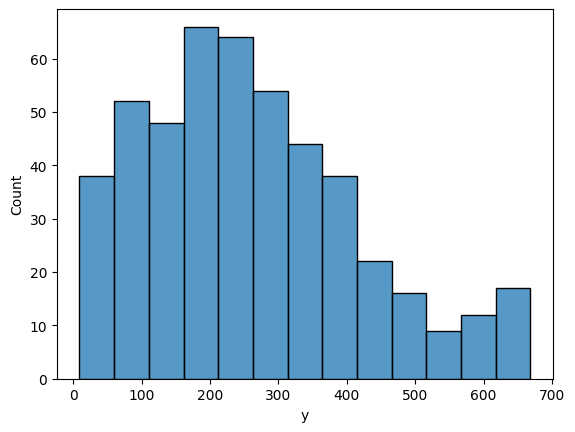

In [196]:
sns.histplot(df_temp["y"])

<Axes: xlabel='y', ylabel='Count'>

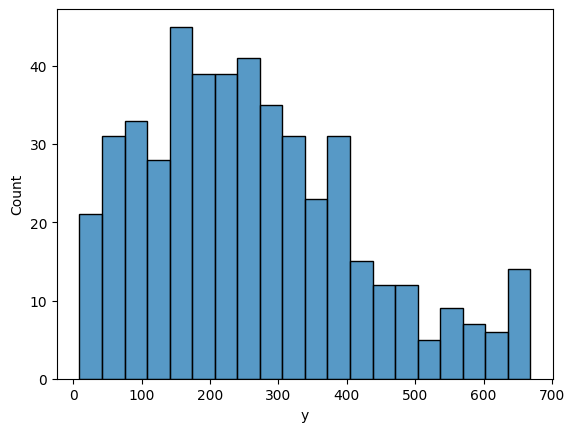

In [197]:
sns.histplot(y_train, bins=20)

<Axes: xlabel='y', ylabel='Count'>

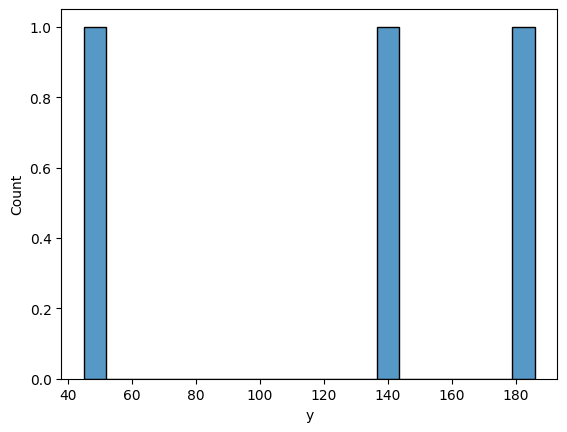

In [198]:
sns.histplot(y_test, bins=20)

<Axes: ylabel='Count'>

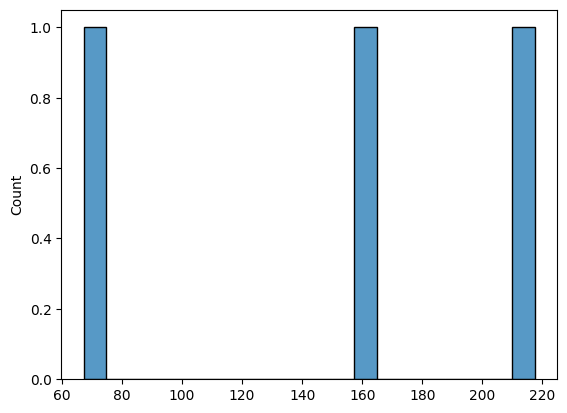

In [199]:
sns.histplot(y_pred, bins=20)

<Axes: ylabel='y'>

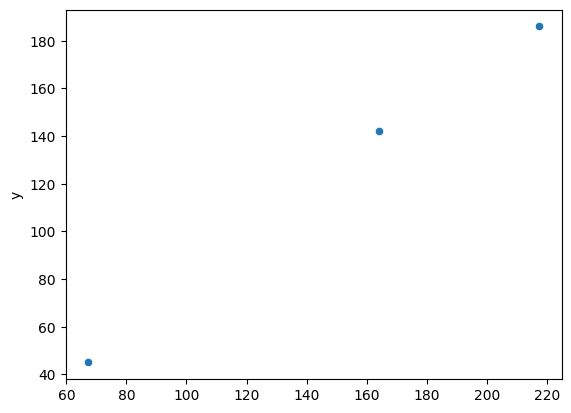

In [200]:
sns.scatterplot(x=y_pred, y=y_test)

<Axes: xlabel='y', ylabel='Count'>

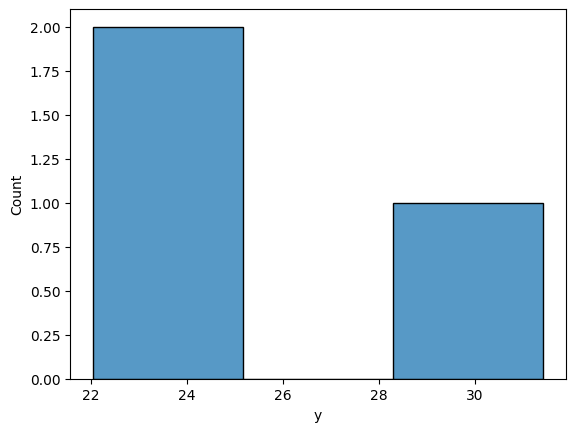

In [201]:
sns.histplot(y_pred-y_test)

In [202]:
print(np.sum(np.abs(y_pred - y_test) > 100))

0


In [203]:
len(y_test)

3

In [204]:
df_test.head()

,Date,Hour,Humidity(%),Wind speed (m/s),Visibility (10m),Solar Radiation (MJ/m2),Rainfall(mm),Snowfall (cm),Seasons,Holiday,Functioning Day,Month,Day,Weekday,working_hour,temp_pca
0,21/12/2017,0,90,2.0,259,0.0,0.0,2.2,Winter,No Holiday,Yes,12,21,3,0,8.826796
1,21/12/2017,1,90,1.6,263,0.0,0.0,2.2,Winter,No Holiday,Yes,12,21,3,0,8.146256
2,21/12/2017,2,88,1.4,348,0.0,0.0,2.2,Winter,No Holiday,Yes,12,21,3,0,7.340061
3,21/12/2017,3,89,1.3,288,0.0,0.0,2.2,Winter,No Holiday,Yes,12,21,3,0,6.561813
4,21/12/2017,4,91,1.2,241,0.0,0.0,2.2,Winter,No Holiday,Yes,12,21,3,0,5.870820


In [205]:

df_test=pre_processing(df_test)

In [206]:
df_test.head()

,Hour,Humidity(%),Visibility (10m),Solar Radiation (MJ/m2),Rainfall(mm),Seasons,Functioning Day,Month,Day,Weekday,working_hour,temp_pca
0,0,90,259,0.0,0.0,3,1,12,21,3,0,8.826796
1,1,90,263,0.0,0.0,3,1,12,21,3,0,8.146256
2,2,88,348,0.0,0.0,3,1,12,21,3,0,7.340061
3,3,89,288,0.0,0.0,3,1,12,21,3,0,6.561813
4,4,91,241,0.0,0.0,3,1,12,21,3,0,5.870820


In [207]:
df_test[df_test['Functioning Day']==0]

,Hour,Humidity(%),Visibility (10m),Solar Radiation (MJ/m2),Rainfall(mm),Seasons,Functioning Day,Month,Day,Weekday,working_hour,temp_pca
2664,0,82,1041,0.0,0.0,1,0,11,4,6,0,28.712433
2665,1,81,886,0.0,0.0,1,0,11,4,6,0,27.449060
2666,2,80,885,0.0,0.0,1,0,11,4,6,0,26.136834
2667,3,81,687,0.0,0.0,1,0,11,4,6,0,24.814154
2668,4,83,554,0.0,0.0,1,0,11,4,6,0,23.257659
...,...,...,...,...,...,...,...,...,...,...,...,...
7771,19,71,589,0.0,0.0,0,0,9,11,1,1,23.477392
7772,20,72,526,0.0,0.0,0,0,9,11,1,1,23.739155
7773,21,74,498,0.0,0.0,0,0,9,11,1,0,23.407632
7774,22,75,478,0.0,0.0,0,0,9,11,1,0,23.309925


In [209]:
X_test = df_test.drop(columns=['Month','Day'])
X_test=scaler.transform(X_test)
# You should update/remove the next line once you change the features used for training
y_test_predicted = XGBModel.predict(X_test)
df_test['y'] = y_test_predicted
#df_test['ID']=df_test_ids
df_test.head()
df_test[['y']].to_csv('/content/submission.csv', index=False)

/usr/local/lib/python3.10/dist-packages/sklearn/base.py:458: UserWarning: X has feature names, but StandardScaler was fitted without feature names
  warnings.warn(


In [214]:
df_test['y']

,y
0,529.770935
1,639.189392
2,495.054840
3,495.054840
4,495.054840
...,...
8275,489.358429
8276,489.358429
8277,495.054840
8278,495.054840


In [210]:
X_test = df_test.drop(columns=['Month','Day'])
X_test.head()

,Hour,Humidity(%),Visibility (10m),Solar Radiation (MJ/m2),Rainfall(mm),Seasons,Functioning Day,Weekday,working_hour,temp_pca,y
0,0,90,259,0.0,0.0,3,1,3,0,8.826796,529.770935
1,1,90,263,0.0,0.0,3,1,3,0,8.146256,639.189392
2,2,88,348,0.0,0.0,3,1,3,0,7.340061,495.054840
3,3,89,288,0.0,0.0,3,1,3,0,6.561813,495.054840
4,4,91,241,0.0,0.0,3,1,3,0,5.870820,495.054840


In [211]:
df_test.describe()

,Hour,Humidity(%),Visibility (10m),Solar Radiation (MJ/m2),Rainfall(mm),Seasons,Functioning Day,Month,Day,Weekday,working_hour,temp_pca,y
count,8280.000000,8280.000000,8280.000000,8280.000000,8280.000000,8280.000000,8280.000000,8280.000000,8280.000000,8280.000000,8280.000000,8280.000000,8280.000000
mean,11.500000,58.508696,1433.854106,0.589843,0.155725,1.408696,0.964372,6.400000,15.831884,3.017391,0.666667,22.922132,462.049225
std,6.922605,20.354069,606.599787,0.884841,1.158973,1.084038,0.185372,3.384225,9.013297,2.000045,0.471433,16.410566,109.992149
min,0.000000,0.000000,27.000000,0.000000,0.000000,0.000000,0.000000,1.000000,1.000000,0.000000,0.000000,-22.513690,158.585770
25%,5.750000,43.000000,934.750000,0.000000,0.000000,0.000000,1.000000,3.000000,8.000000,1.000000,0.000000,12.078128,487.863342
50%,11.500000,58.000000,1686.000000,0.020000,0.000000,1.000000,1.000000,6.000000,16.000000,3.000000,1.000000,24.188640,489.358429
75%,17.250000,74.000000,2000.000000,0.980000,0.000000,2.000000,1.000000,9.000000,24.000000,5.000000,1.000000,36.169884,495.054840
max,23.000000,98.000000,2000.000000,3.520000,35.000000,3.000000,1.000000,12.000000,31.000000,6.000000,1.000000,52.052819,676.621338


In [212]:
df_test[df_test['Functioning Day']==0]

,Hour,Humidity(%),Visibility (10m),Solar Radiation (MJ/m2),Rainfall(mm),Seasons,Functioning Day,Month,Day,Weekday,working_hour,temp_pca,y
2664,0,82,1041,0.0,0.0,1,0,11,4,6,0,28.712433,529.770935
2665,1,81,886,0.0,0.0,1,0,11,4,6,0,27.449060,639.189392
2666,2,80,885,0.0,0.0,1,0,11,4,6,0,26.136834,495.054840
2667,3,81,687,0.0,0.0,1,0,11,4,6,0,24.814154,495.054840
2668,4,83,554,0.0,0.0,1,0,11,4,6,0,23.257659,495.054840
...,...,...,...,...,...,...,...,...,...,...,...,...,...
7771,19,71,589,0.0,0.0,0,0,9,11,1,1,23.477392,489.358429
7772,20,72,526,0.0,0.0,0,0,9,11,1,1,23.739155,489.358429
7773,21,74,498,0.0,0.0,0,0,9,11,1,0,23.407632,495.054840
7774,22,75,478,0.0,0.0,0,0,9,11,1,0,23.309925,495.054840
